Total Game Score Model - Hyperparameter Tuning - GBM

In [67]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import joblib

pd.options.display.max_rows = 10
pd.options.display.max_columns = 999

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load Data

ModellingDataLoader class

In [68]:
# from modelling_data_preparation import DataLoader

In [69]:
data = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/total-points-score-model/data/modelling-data/modelling_data_total_team_score.csv")

In [70]:
data.tail(2)

,Unnamed: 0,Match_ID,AFL_API_Match_ID,Home_Team,Away_Team,Date,Venue,Match_Status,Q4_Score,Round_ID,Year,Q1_Score,Q2_Score,Q3_Score,Margin,Total_Game_Score,Home_Win,City,Attendance,Umpires,Home_Coach_ID,Away_Coach_ID,Q5_Score,Temperature,Weather_Type,Home_Score,Away_Score,Home_Goals,Home_Behinds,Home_Total_Score,Away_Goals,Away_Behinds,Away_Total_Score,random5,training_set,Home_Total_Game_Score_avg2,Home_For_Goals_avg2,Home_For_Behinds_avg2,Home_For_Scores_avg2,Home_For_Total_Score_avg2,Home_Against_Goals_avg2,Home_Against_Behinds_avg2,Home_Against_Scores_avg2,Home_Against_Total_Score_avg2,Home_Total_Game_Score_avg10,Home_For_Goals_avg10,Home_For_Behinds_avg10,Home_For_Scores_avg10,Home_For_Total_Score_avg10,Home_Against_Goals_avg10,Home_Against_Behinds_avg10,Home_Against_Scores_avg10,Home_Against_Total_Score_avg10,Away_Total_Game_Score_avg2,Away_For_Goals_avg2,Away_For_Behinds_avg2,Away_For_Scores_avg2,Away_For_Total_Score_avg2,Away_Against_Goals_avg2,Away_Against_Behinds_avg2,Away_Against_Scores_avg2,Away_Against_Total_Score_avg2,Away_Total_Game_Score_avg10,Away_For_Goals_avg10,Away_For_Behinds_avg10,Away_For_Scores_avg10,Away_For_Total_Score_avg10,Away_Against_Goals_avg10,Away_Against_Behinds_avg10,Away_Against_Scores_avg10,Away_Against_Total_Score_avg10
3004,3005,2022F3_Sydney_Collingwood,CD_M20220142602,Sydney,Collingwood,2022-09-17 16:45:00,S.C.G.,CONCLUDED,14.11.95 - 14.10.94,2022F3,2022,6.3.39 - 3.0.18,11.7.73 - 7.1.43,13.10.88 - 10.5.65,1,189,1.0,Sydney,45608.0,NaN,John_Longmire,Craig_McRae,NaN,23.0,MOSTLY_SUNNY,14.11.95,14.10.94,14,11,95,14,10,94,5,False,174.5,14.0,9.0,23.0,93.0,12.0,9.5,21.5,81.5,172.1,14.4,13.1,27.5,99.5,10.5,9.6,20.1,72.6,163.5,12.5,11.5,24.0,86.5,11.5,8.0,19.5,77.0,161.0,12.0,9.3,21.3,81.3,11.6,10.1,21.7,79.7
3005,3006,2022F4_Geelong_Sydney,CD_M20220142701,Geelong,Sydney,2022-09-24 14:30:00,M.C.G.,CONCLUDED,20.13.133 - 8.4.52,2022F4,2022,6.5.41 - 1.0.6,9.8.62 - 4.2.26,15.11.101 - 4.3.27,81,185,1.0,Melbourne,100024.0,"Simon Meredith (439), Matt Stevic (449), Brend...",Chris_Scott,John_Longmire,NaN,15.0,RAIN,20.13.133,8.4.52,20,13,133,8,4,52,4,True,177.0,19.0,12.5,31.5,126.5,7.5,5.5,13.0,50.5,168.8,15.7,12.5,28.2,106.7,9.1,7.5,16.6,62.1,187.0,11.0,7.5,18.5,73.5,17.0,11.5,28.5,113.5,172.5,14.0,12.1,26.1,96.1,11.0,10.4,21.4,76.4


Load Model

In [73]:
xgb_model = joblib.load("xgb_regression.joblib")

Clean Data

In [74]:
def preprocess_modelling_data(data):
    
    modelling_data = data[data['Date'] < "2019-01-01"]
    oot_data = data[data['Date'] >= "2019-01-01"]
    
    training_data = modelling_data[modelling_data['training_set'] == True]
    test_data = modelling_data[modelling_data['training_set'] == False]
    
    return training_data, test_data, oot_data

In [75]:
training_data, test_data, oot_data = preprocess_modelling_data(data)

Preprocessor class

In [76]:
# from preprocessor.py import Preprocessor

In [77]:
response = "Total_Game_Score"

In [78]:
modelling_features = [
    'Venue',
    'Year',
    'Temperature',
    'Weather_Type',
    'Home_Team',
    'Away_Team',
    'Home_Total_Game_Score_avg2',
    'Home_For_Goals_avg2',
    'Home_For_Behinds_avg2',
    'Home_For_Scores_avg2',
    'Home_For_Total_Score_avg2',
    'Home_Against_Goals_avg2',
    'Home_Against_Behinds_avg2',
    'Home_Against_Scores_avg2',
    'Home_Against_Total_Score_avg2',
    'Home_Total_Game_Score_avg10',
    'Home_For_Goals_avg10',
    'Home_For_Behinds_avg10',
    'Home_For_Scores_avg10',
    'Home_For_Total_Score_avg10',
    'Home_Against_Goals_avg10',
    'Home_Against_Behinds_avg10',
    'Home_Against_Scores_avg10',
    'Home_Against_Total_Score_avg10',
    'Away_Total_Game_Score_avg2',
    'Away_For_Goals_avg2',
    'Away_For_Behinds_avg2',
    'Away_For_Scores_avg2',
    'Away_For_Total_Score_avg2',
    'Away_Against_Goals_avg2',
    'Away_Against_Behinds_avg2',
    'Away_Against_Scores_avg2',
    'Away_Against_Total_Score_avg2',
    'Away_Total_Game_Score_avg10',
    'Away_For_Goals_avg10',
    'Away_For_Behinds_avg10',
    'Away_For_Scores_avg10',
    'Away_For_Total_Score_avg10',
    'Away_Against_Goals_avg10',
    'Away_Against_Behinds_avg10',
    'Away_Against_Scores_avg10',
    'Away_Against_Total_Score_avg10']

In [79]:
def get_modelling_features(data, feature_list, response):
    
    X, y = data[feature_list], data[response]
    
    return X, y

In [80]:
X_train, y_train = get_modelling_features(training_data, modelling_features, response)
X_test, y_test = get_modelling_features(test_data, modelling_features, response)
X_oot, y_oot = get_modelling_features(oot_data, modelling_features, response)

In [81]:
def one_hot_encode_fit(X):
    
    X_dummies = pd.get_dummies(X)
    
    return list(X_dummies)

In [82]:
def one_hot_encode_transform(X, expected_features):
    
    X_dummies = pd.get_dummies(X)
    
    for col in list(expected_features):
        if col not in list(X_dummies):
            X_dummies[col] = 0
            
    X_dummies = X_dummies[expected_features]
    
    return X_dummies

In [83]:
ohe_expected_features = one_hot_encode_fit(X_train)
X_train_dummies = one_hot_encode_transform(X_train, expected_features=ohe_expected_features)
X_test_dummies = one_hot_encode_transform(X_test, expected_features=ohe_expected_features)
X_oot_dummies = one_hot_encode_transform(X_oot, expected_features=ohe_expected_features)

In [84]:
X_train_dummies.shape, X_test_dummies.shape, X_oot_dummies.shape, 

((1909, 104), (476, 104), (621, 104))

Feature Selection

In [85]:
# from feature_selector import XGBFeatureSelector

In [86]:
selected_feature_list = [
    'Home_Total_Game_Score_avg2',
    'Home_Against_Total_Score_avg2',
    'Home_For_Goals_avg10',
    'Home_For_Behinds_avg10',
    'Home_For_Total_Score_avg10',
    'Home_Against_Goals_avg10',
    'Home_Against_Behinds_avg10',
    'Home_Against_Scores_avg10',
    'Home_Against_Total_Score_avg10',
    'Away_Total_Game_Score_avg2',
    'Away_For_Goals_avg2',
    'Away_For_Scores_avg2',
    'Away_For_Total_Score_avg2',
    'Away_Against_Behinds_avg2',
    'Away_Against_Scores_avg2',
    'Away_Against_Total_Score_avg2',
    'Away_Total_Game_Score_avg10',
    'Away_For_Goals_avg10',
    'Away_For_Behinds_avg10',
    'Away_For_Scores_avg10',
    'Away_Against_Goals_avg10',
    'Away_Against_Behinds_avg10',
    'Away_Against_Scores_avg10',
    'Away_Against_Total_Score_avg10',
    'Venue_Docklands',
    'Venue_Marrara Oval',
    'Venue_Perth Stadium',
    'Weather_Type_CLEAR_NIGHT',
    'Weather_Type_MOSTLY_CLEAR',
    'Weather_Type_RAIN',
    'Home_Team_Essendon',
    'Away_Team_Adelaide',
    'Away_Team_Collingwood',
    'Away_Team_Sydney',
    'Away_Team_West Coast',
    'Away_Team_Western Bulldogs'
]

In [87]:
def get_selected_feature_data(X_dummies, selected_features):
    
    X_selected = X_dummies[selected_features]
    
    return X_selected

In [88]:
X_train_selected = get_selected_feature_data(X_train_dummies, selected_feature_list)
X_test_selected = get_selected_feature_data(X_test_dummies, selected_feature_list)
X_oot_selected = get_selected_feature_data(X_oot_dummies, selected_feature_list)

Get Predictions

In [90]:
train_preds = xgb_model.predict(X_train_selected)
test_preds = xgb_model.predict(X_test_selected)
oot_preds = xgb_model.predict(X_oot_selected)

Evaluate Model

In [160]:
test_evaluation_data = X_test_selected.copy()
test_evaluation_data['xgb_preds'] = xgb_model.predict(X_test_selected)
test_evaluation_data[response] = y_test
test_evaluation_data.head()

,Home_Total_Game_Score_avg2,Home_Against_Total_Score_avg2,Home_For_Goals_avg10,Home_For_Behinds_avg10,Home_For_Total_Score_avg10,Home_Against_Goals_avg10,Home_Against_Behinds_avg10,Home_Against_Scores_avg10,Home_Against_Total_Score_avg10,Away_Total_Game_Score_avg2,Away_For_Goals_avg2,Away_For_Scores_avg2,Away_For_Total_Score_avg2,Away_Against_Behinds_avg2,Away_Against_Scores_avg2,Away_Against_Total_Score_avg2,Away_Total_Game_Score_avg10,Away_For_Goals_avg10,Away_For_Behinds_avg10,Away_For_Scores_avg10,Away_Against_Goals_avg10,Away_Against_Behinds_avg10,Away_Against_Scores_avg10,Away_Against_Total_Score_avg10,Venue_Docklands,Venue_Marrara Oval,Venue_Perth Stadium,Weather_Type_CLEAR_NIGHT,Weather_Type_MOSTLY_CLEAR,Weather_Type_RAIN,Home_Team_Essendon,Away_Team_Adelaide,Away_Team_Collingwood,Away_Team_Sydney,Away_Team_West Coast,Away_Team_Western Bulldogs,xgb_preds,Total_Game_Score
1,173.975516,85.762832,12.486932,11.141717,86.063309,12.410072,11.107177,23.51725,85.567612,173.975516,12.487906,23.629007,86.068535,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,12.410072,11.107177,23.51725,85.567612,0,0,0,0,0,0,0,0,0,0,0,0,167.432190,113
2,173.975516,85.762832,12.486932,11.141717,86.063309,12.410072,11.107177,23.51725,85.567612,173.975516,12.487906,23.629007,86.068535,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,12.410072,11.107177,23.51725,85.567612,0,0,0,0,0,0,0,0,0,0,0,0,167.432190,213
4,173.975516,85.762832,12.486932,11.141717,86.063309,12.410072,11.107177,23.51725,85.567612,173.975516,12.487906,23.629007,86.068535,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,12.410072,11.107177,23.51725,85.567612,0,0,0,0,0,0,0,0,0,0,0,0,167.432190,155
9,206.500000,93.000000,12.486932,11.141717,86.063309,12.410072,11.107177,23.51725,85.567612,230.000000,16.500000,26.000000,108.500000,7.500000,26.500000,121.500000,173.8038,12.486932,11.141717,23.628649,12.410072,11.107177,23.51725,85.567612,1,0,0,0,0,0,1,0,0,0,0,0,238.588577,234
15,194.000000,101.500000,12.486932,11.141717,86.063309,12.410072,11.107177,23.51725,85.567612,180.500000,13.000000,27.000000,92.000000,7.500000,21.000000,88.500000,173.8038,12.486932,11.141717,23.628649,12.410072,11.107177,23.51725,85.567612,0,0,0,0,0,0,0,1,0,0,0,0,187.077484,182


In [178]:
from model_evaluation import XGBRegressorEvaluator

In [179]:
test_xgb_evals = XGBRegressorEvaluator(model = xgb_model,
                                       data = test_evaluation_data,
                                       actual_name = response,
                                       expected_name = "xgb_preds"
                                       )

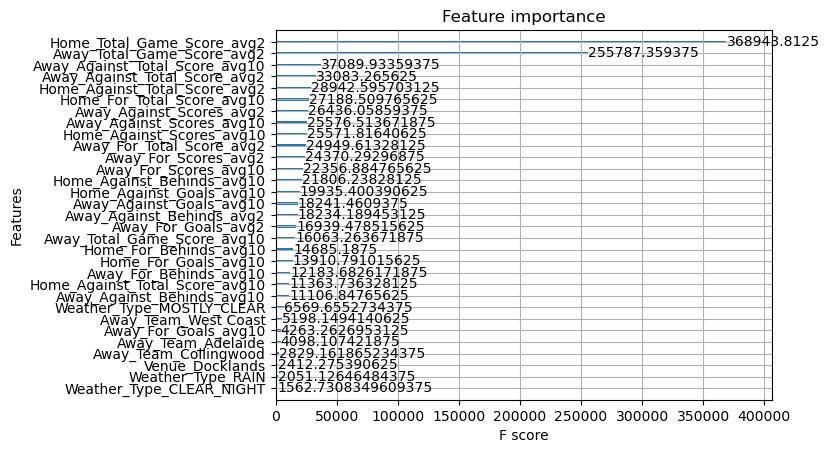

In [180]:
test_xgb_evals.plot_feature_importance()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


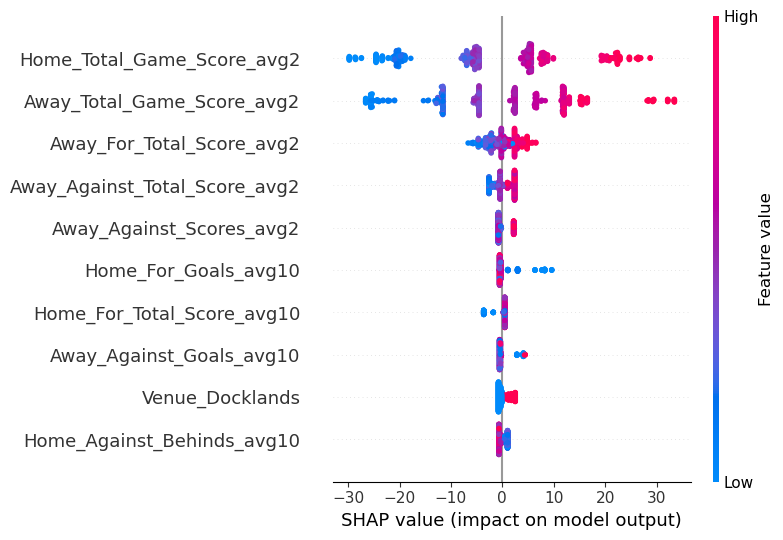

In [181]:
test_xgb_evals.plot_shap_summary_plot()

In [184]:
feature_list = [
    'Home_Total_Game_Score_avg2'
]

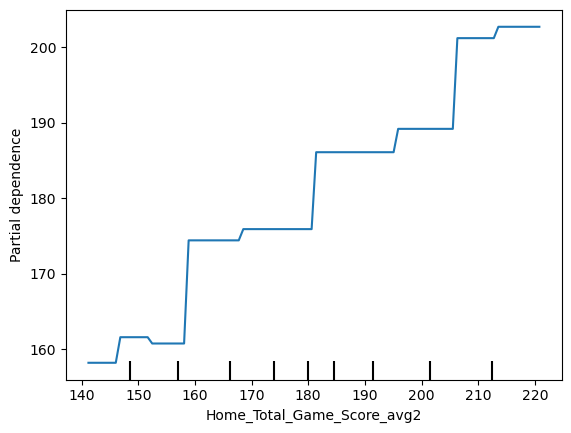

In [185]:
test_xgb_evals.plot_pdp(feature_list)

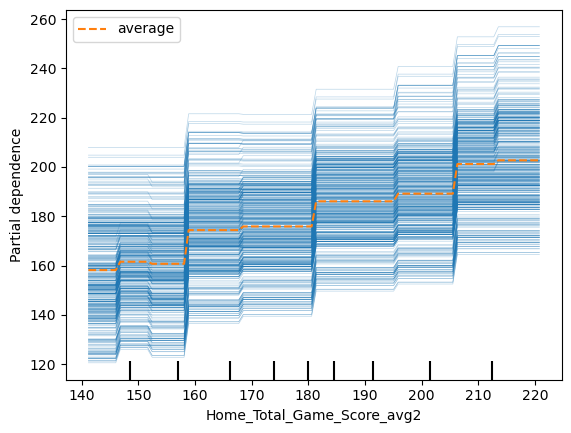

In [186]:
test_xgb_evals.plot_ice(feature_list)

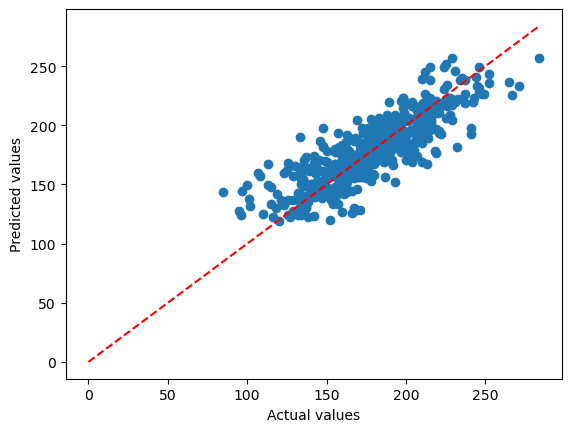

In [188]:
test_xgb_evals.plot_ave()

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


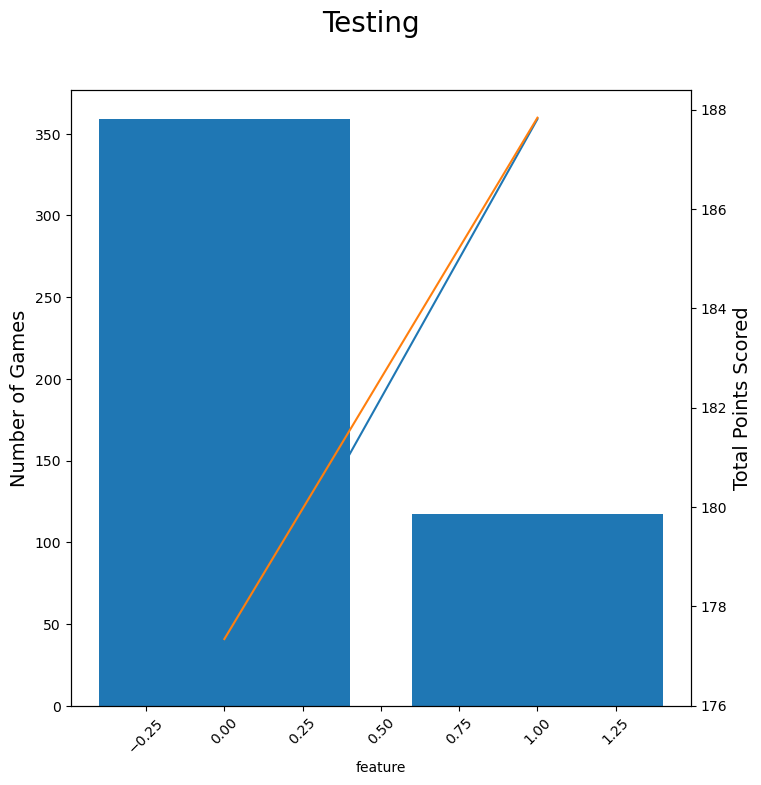

In [199]:
test_xgb_evals.plot_feature_ave('Venue_Docklands')

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


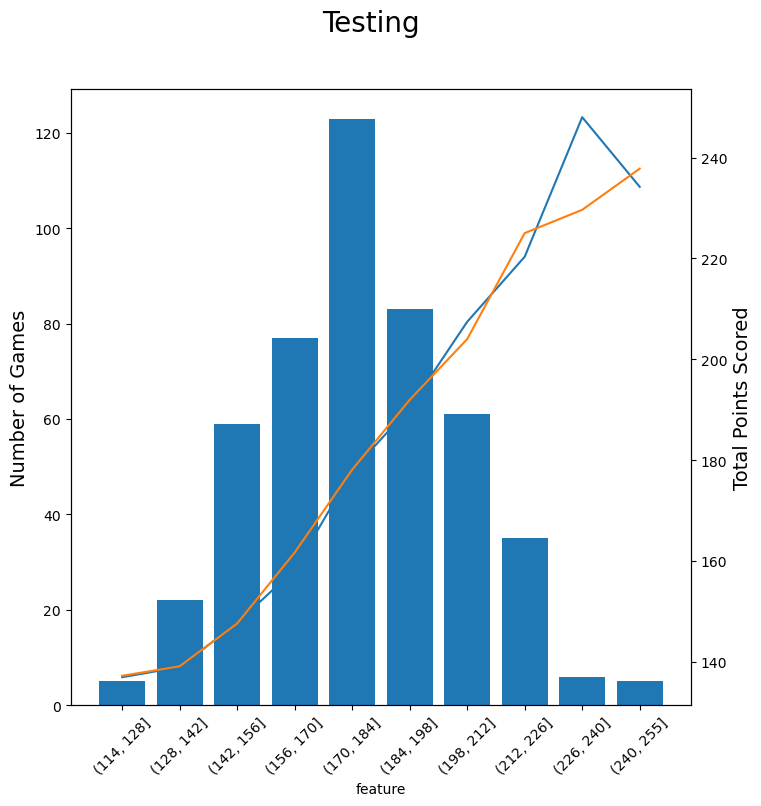

In [200]:
test_xgb_evals.plot_feature_ave('Home_Total_Game_Score_avg2')

In [202]:
test_xgb_evals.get_mae()

14.060281593258642

In [203]:
test_xgb_evals.get_mse()

330.1677527483556

In [204]:
test_xgb_evals.get_r2_score()

0.6950276257699255